In [1]:
#This script takes eddy observations, tracks the eddies and measues some statistics
from datetime import datetime
filenamepath="/home/mavida/dat1/miniconda3/eddytracking/filenames.npy"
tmax=30

savepath="eddies/" #path to save the eddies
file_objects=[]
for t in range(tmax):
    file_objects.append(savepath+str(t)+"a.nc")

In [2]:
from py_eddy_tracker.data import get_remote_demo_sample
from py_eddy_tracker.featured_tracking.area_tracker import AreaTracker
from py_eddy_tracker.gui import GUI
from py_eddy_tracker.tracking import Correspondances

In [3]:
import logging
from matplotlib import pyplot as plt
from netCDF4 import Dataset

from py_eddy_tracker import start_logger
from py_eddy_tracker.data import get_remote_demo_sample
from py_eddy_tracker.featured_tracking.area_tracker import AreaTracker

# In order to hide some warning
import py_eddy_tracker.observations.observation
from py_eddy_tracker.tracking import Correspondances

py_eddy_tracker.observations.observation._display_check_warning = False

from datetime import datetime

from matplotlib import pyplot as plt
from numpy import arange
import numpy as np

from py_eddy_tracker import data
from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.eddy_feature import Contours
from datetime import timedelta, date



In [4]:
#import data
xname="longitude" #name of x coordinate
yname="latitude" #name of y coordinate
tname="time"

#PUT YOUR LIST OF FILENAMES WITH THE EDDY OBJECTS HERE; MAKE SURE TO ONLY USE ANTICYCLONIC OR CYCLONIC BUT NOT BOTH
file_objects=[]

In [ ]:
#This actually runs the eddy tracking
c_first_run = Correspondances(
    datasets=file_objects, class_method=AreaTracker, virtual=4
)
start_logger().setLevel("INFO")
c_first_run.track()
start_logger().setLevel("WARNING")
with Dataset("correspondances.nc", "w") as h:
    c_first_run.to_netcdf(h)
# Next step are done only to build atlas and display it
c_first_run.prepare_merging()

# We have now an eddy object
eddies_area_tracker = c_first_run.merge(raw_data= False)
eddies_area_tracker.virtual[:] = eddies_area_tracker.time == 0
eddies_area_tracker.filled_by_interpolation(eddies_area_tracker.virtual == 1)

/home/mavida/.local/lib/python3.7/site-packages/py_eddy_tracker/observations/observation.py:302: RuntimeWarning: invalid value encountered in true_divide
  v /= hist_numba(x, bins=bins)[0]


| 786 observations from 26252.0 to 26281.0 (30.0 days, ~26 obs/day)
    |   Speed area      : 0.21 Mkm²/day
    |   Effective area  : 0.31 Mkm²/day
    ----Distribution in Amplitude:
    |   Amplitude bounds (cm)        0.00      1.00      2.00      3.00      4.00      5.00     10.00    500.00
    |   Percent of eddies         :      14.12     23.03     13.61     12.09      7.12     11.32     18.70
    ----Distribution in Radius:
    |   Speed radius (km)            0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       0.00     22.39     36.77     18.45      8.52      9.80      4.07      0.00
    |   Effective radius (km)        0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       0.00     17.30     32.82     21.76      6.49      8.65     12.98      0.00
    ----Distribution in Latitude
        Latitude bounds            -90.00    -60.00    -15.00     15.00     60.00     90.00
        Percent of eddies         :       0.00      0.00      0.00    100.00      0.00
        Percent of speed area     :       0.00      0.00      0.00    100.00      0.00
        Percent of effective area :       0.00      0.00      0.00    100.00      0.00
        Mean speed radius (km)    :        nan       nan       nan     47.82       nan
        Mean effective radius (km):        nan       nan       nan     56.50       nan
        Mean amplitude (cm)       :        nan       nan       nan      5.91       nan
    | 79 tracks (9.95 obs/tracks, shorter 2 obs, longer 30 obs)
    |   31 filled observations (0.39 obs/tracks, 3.94 % of total)
    |   Intepolated speed area      : 0.00 Mkm²/day
    |   Intepolated effective area  : 0.00 Mkm²/day
    |   Distance by day             : Mean 6.38 , Median 4.72 km/day
    |   Distance by track           : Mean 57.12 , Median 43.46 km/track
    ----Distribution in lifetime:
    |   Lifetime (days  )            1.00     30.00     90.00    180.00    270.00    365.00   1000.00  10000.00
    |   Percent of tracks         :      93.67      6.33      0.00      0.00      0.00      0.00      0.00
    |   Percent of eddies         :      80.92     19.08      0.00      0.00      0.00      0.00      0.00

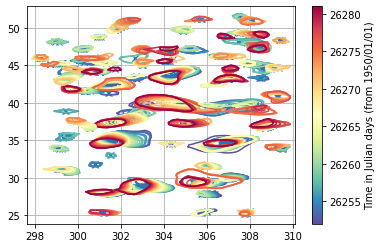

In [6]:
#This is one eddy visualization that puts all the observations on the same plot
fig,ax=plt.subplots()
ed=eddies_area_tracker
ed.plot(ax,ref=-10, marker="x")
lc = ed.display_color(ax, field=ed.time, ref=-10, intern=True)
plt.colorbar(lc).set_label("Time in Julian days (from 1950/01/01)")
ax.grid()
ed

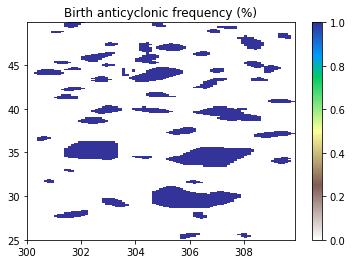

In [7]:
#This calculates birth anticyclonic frequency by coordinates
a =eddies_area_tracker

t0, t1 = a.period
step = 0.125
bins = ((300, 310, step), (25, 50, step))
kwargs = dict(cmap="terrain_r", factor=100 / (t1 - t0), name="count", vmin=0, vmax=1)

fig,ax=plt.subplots()
g_a_first = a.first_obs().grid_count(bins, intern=True)
plt.title("Birth anticyclonic frequency (%)")
m = g_a_first.display(ax, **kwargs)
plt.colorbar(m)

Text(0.5, 1.0, 'Death anticyclonic frequency (%)')

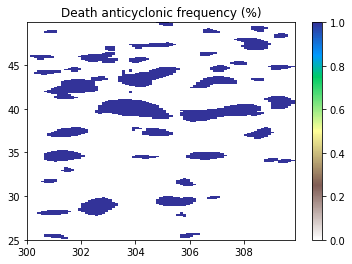

In [8]:
#This calculates death anticyclonic frequency by coordinates
fig,ax=plt.subplots()
a =eddies_area_tracker
g_a_last = a.last_obs().grid_count(bins, intern=True)
kwargs = dict(cmap="terrain_r", factor=100 / (t1 - t0), name="count", vmin=0, vmax=1)

m = g_a_last.display(ax, **kwargs)
plt.colorbar(m)
plt.title("Death anticyclonic frequency (%)")

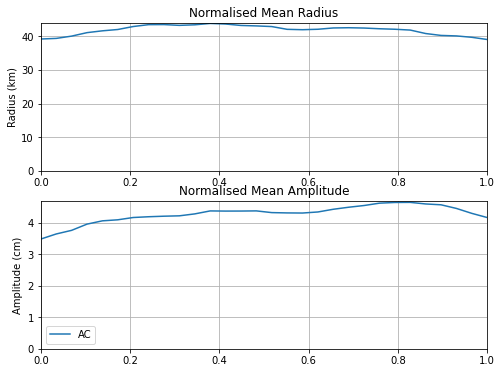

In [9]:
#This script calculates normalized mean radius and amplitude
"""
Normalised Eddy Lifetimes
=========================

Example from Evan Mason
"""
from matplotlib import pyplot as plt
from numba import njit
from numpy import interp, linspace, zeros

from py_eddy_tracker.observations.tracking import TrackEddiesObservations


# %%
@njit(cache=True)
def sum_profile(x_new, y, out):
    """Will sum all interpolated given array"""
    out += interp(x_new, linspace(0, 1, y.size), y)


def eddy_norm_lifetime(A, name, nb, factor=1):
    """
    :param str,array name: Array or field name
    :param int nb: size of output array
        """
    y = A.parse_varname(name)
    x = linspace(0, 1, nb)
    out = zeros(nb, dtype=y.dtype)
    nb_track = 0
    for i, b0, b1 in A.iter_on("track"):
        y_ = y[i]
        size_ = y_.size
        if size_ == 0:
            continue
        sum_profile(x, y_, out)
        nb_track += 1
    return x, out / nb_track * factor


# %%
# Load atlas
# ----------
kw = dict(include_vars=("speed_radius", "amplitude", "track"))
nb_max_a = a.nb_obs_by_track.max()

# %%
# Compute normalised lifetime
# ---------------------------

# Radius
AC_radius = eddy_norm_lifetime(a,"speed_radius", nb=nb_max_a, factor=1e-3)
# Amplitude
AC_amplitude = eddy_norm_lifetime(a,"amplitude", nb=nb_max_a, factor=1e2)

# %%
# Figure
# ------
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 6))

ax0.set_title("Normalised Mean Radius")
ax0.plot(*AC_radius)
ax0.set_ylabel("Radius (km)"), ax0.grid()
ax0.set_xlim(0, 1), ax0.set_ylim(0, None)

ax1.set_title("Normalised Mean Amplitude")
ax1.plot(*AC_amplitude, label="AC")
ax1.set_ylabel("Amplitude (cm)"), ax1.grid(), ax1.legend()
_ = ax1.set_xlim(0, 1), ax1.set_ylim(0, None)


Text(0.5, 1.0, 'Eddy lifetime histogram')

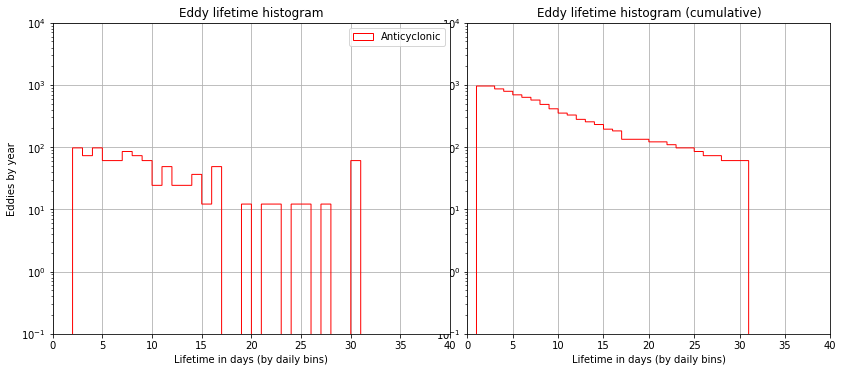

In [14]:
#This creates an eddy lifetime histogram
a =eddies_area_tracker

from matplotlib import pyplot as plt
from numpy import arange, ones

from py_eddy_tracker.observations.tracking import TrackEddiesObservations
nb_year = (a.period[1] - a.period[0] + 1) / 365.25
figure = plt.figure(figsize=(12, 8))
ax_cum = figure.add_axes([0.55, 0.43, 0.42, 0.54])
ax = figure.add_axes([0.07, 0.43, 0.46, 0.54])
ax.set_ylabel("Eddies by year")
for ax_ in (ax, ax_cum):
    ax_.set_xlim(0, 40)
    if ax_ in (ax, ax_cum):
        ax_.set_xlabel("Lifetime in days (by daily bins)")
        ax_.set_ylim(1e-1, 1e4), ax_.set_yscale("log")
    ax_.grid()
# plot data
bin_hist = arange(1, 2000, 1)
x = (bin_hist[1:] + bin_hist[:-1]) / 2.0
a_nb = a.nb_obs_by_track
a_nb = a_nb[a_nb != 0]
w_a = ones(a_nb.shape) / nb_year
kwargs_a = dict(histtype="step", bins=bin_hist, x=a_nb, color="r", weights=w_a)
cum_a, _, _ = ax_cum.hist(cumulative=-1, **kwargs_a)
nb_a, _, _ = ax.hist(label="Anticyclonic", **kwargs_a)
ax.legend()
ax_cum.set_title("Eddy lifetime histogram (cumulative)")
ax.set_title("Eddy lifetime histogram")

